In [1]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots clean
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


In [9]:
# Cell 2: Load merged dataset (from Day 3 output)
df = pd.read_csv(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\data/processed/ev_master.csv")
df.head()


,country,iso_code,year,ev_share,population,total_chargers,charger_density_per_100k,population_million
0,Australia,AUS,2011,0.0061,22479723.0,0.0,0.0,22.479723
1,Australia,AUS,2012,0.0290,22852597.0,0.0,0.0,22.852597
2,Australia,AUS,2013,0.0330,23236224.0,0.0,0.0,23.236224
3,Australia,AUS,2014,0.1500,23595552.0,0.0,0.0,23.595552
4,Australia,AUS,2015,0.1900,23947955.0,0.0,0.0,23.947955


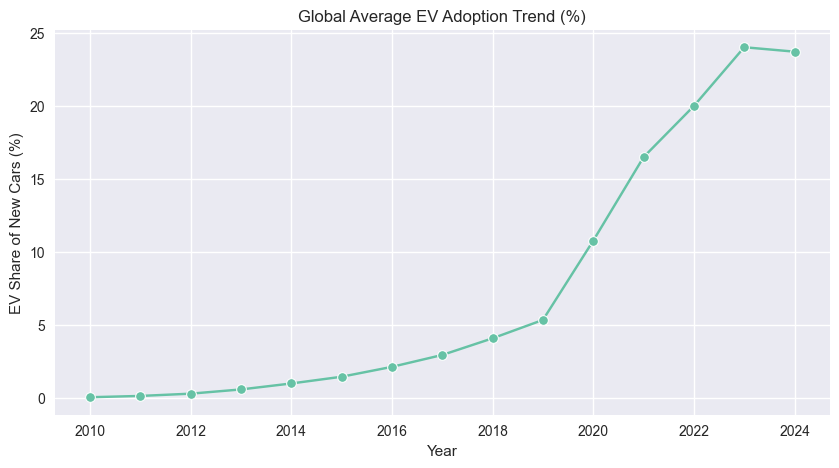

In [10]:
# Global EV adoption trend
global_ev = df.groupby("year")["ev_share"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=global_ev, x="year", y="ev_share", marker="o")
plt.title("Global Average EV Adoption Trend (%)")
plt.ylabel("EV Share of New Cars (%)")
plt.xlabel("Year")
plt.show()



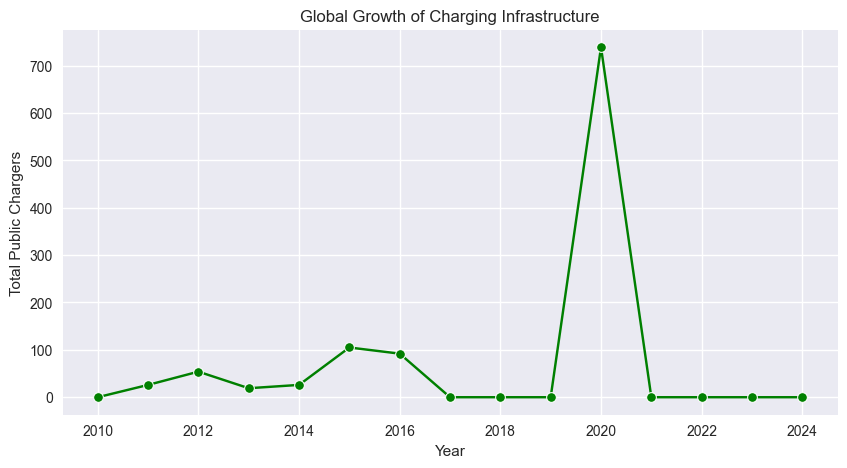

In [11]:
# Global charging infrastructure growth
global_chargers = df.groupby("year")["total_chargers"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=global_chargers, x="year", y="total_chargers", marker="o", color="green")
plt.title("Global Growth of Charging Infrastructure")
plt.ylabel("Total Public Chargers")
plt.xlabel("Year")
plt.show()


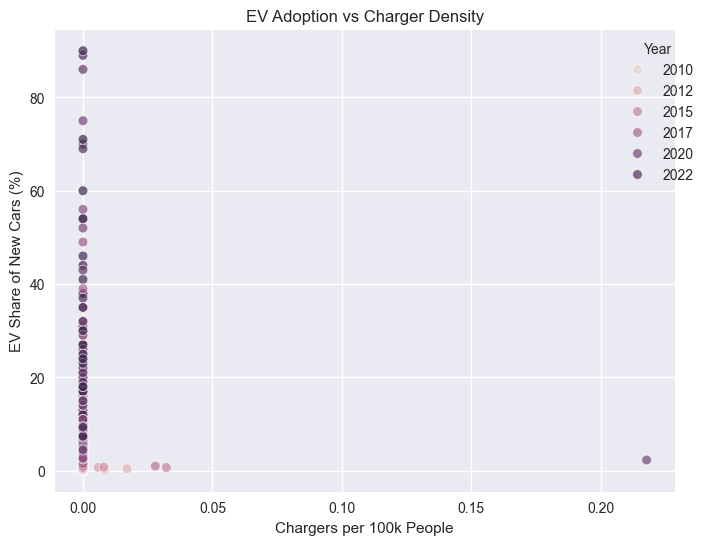

In [12]:
# Relationship: EV adoption vs charger density
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="charger_density_per_100k", y="ev_share", hue="year", alpha=0.7)
plt.title("EV Adoption vs Charger Density")
plt.xlabel("Chargers per 100k People")
plt.ylabel("EV Share of New Cars (%)")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1))
plt.show()


C:\Users\Saket\AppData\Local\Temp\ipykernel_24484\3590954922.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="ev_share", y="country", palette="viridis")


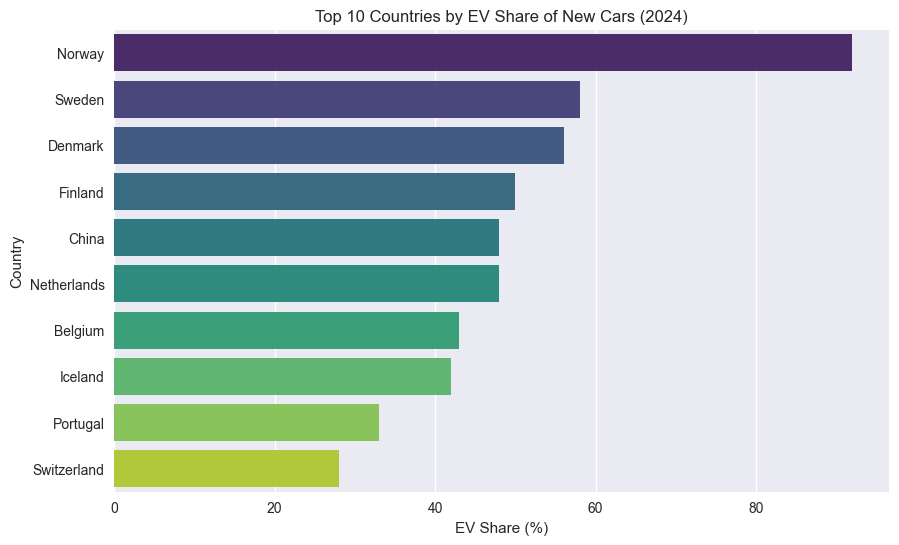

In [13]:
# Top 10 countries by EV adoption in latest year
latest_year = df["year"].max()
top_countries = (df[df["year"] == latest_year]
                 .sort_values("ev_share", ascending=False)
                 .head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x="ev_share", y="country", palette="viridis")
plt.title(f"Top 10 Countries by EV Share of New Cars ({latest_year})")
plt.xlabel("EV Share (%)")
plt.ylabel("Country")
plt.show()


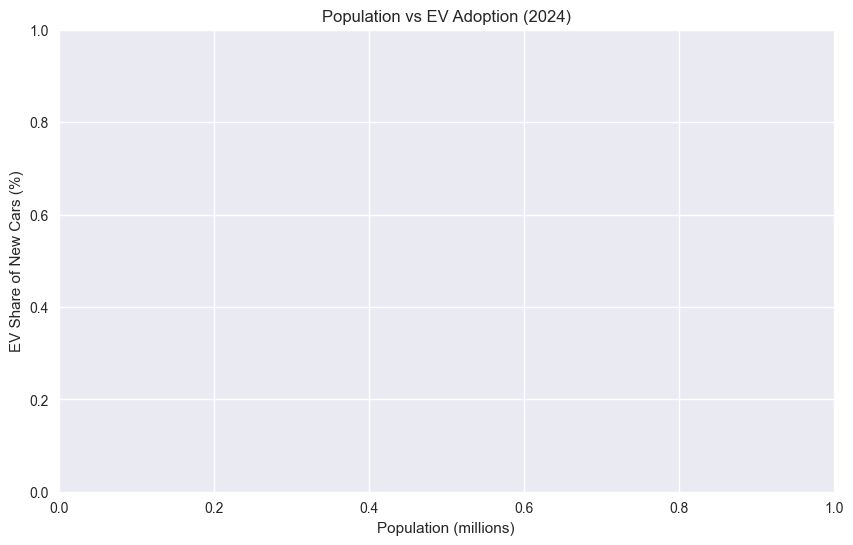

In [14]:
# Bubble plot: Population vs EV adoption
latest_year = df["year"].max()
bubble_df = df[df["year"] == latest_year]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=bubble_df,
    x="population_million",
    y="ev_share",
    size="total_chargers",
    hue="country",
    alpha=0.6,
    legend=False
)
plt.title(f"Population vs EV Adoption ({latest_year})")
plt.xlabel("Population (millions)")
plt.ylabel("EV Share of New Cars (%)")
plt.show()


In [15]:
# Check how many rows have all required fields
needed_cols = ["ev_share", "total_chargers", "population_million"]
print(merged[needed_cols].isna().sum())
print("Rows available for plotting:", merged.dropna(subset=needed_cols).shape[0])


ev_share               0
total_chargers         0
population_million    48
dtype: int64
Rows available for plotting: 444


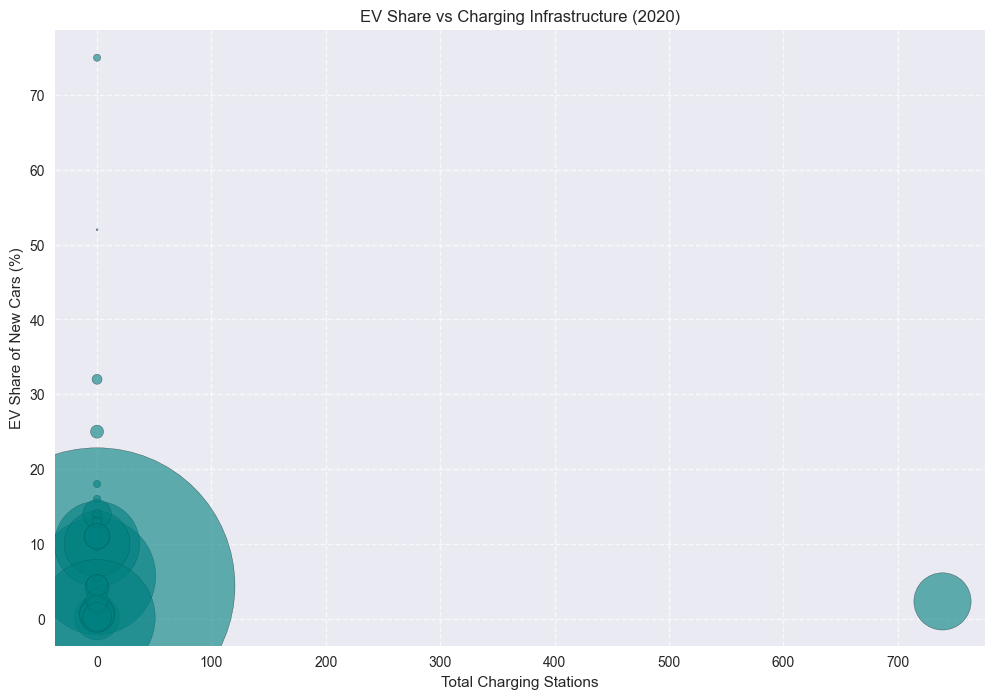

In [17]:
import matplotlib.pyplot as plt

# Keep only rows with complete values
bubble_df = merged.dropna(subset=["ev_share", "total_chargers", "population_million"])

# Example: look at 2020 only (you can change the year)
year = 2020
bubble_df_year = bubble_df[bubble_df["year"] == year]

plt.figure(figsize=(12, 8))
plt.scatter(
    bubble_df_year["total_chargers"],
    bubble_df_year["ev_share"],
    s=bubble_df_year["population_million"] * 5,  # bubble size scaling
    alpha=0.6,
    c="teal",
    edgecolor="k"
)
plt.title(f"EV Share vs Charging Infrastructure ({year})")
plt.xlabel("Total Charging Stations")
plt.ylabel("EV Share of New Cars (%)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


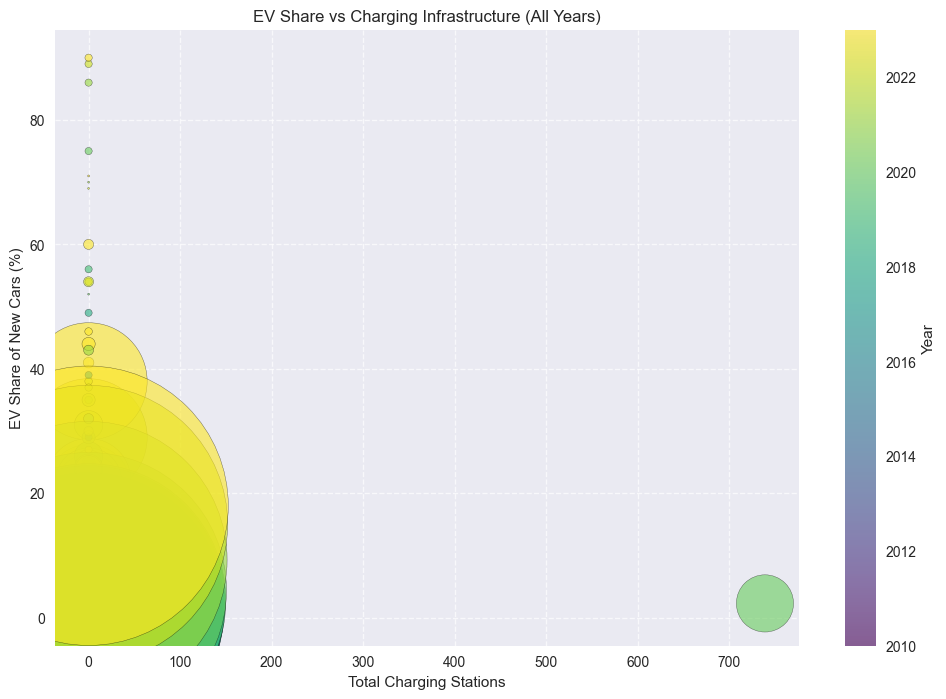

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(
    bubble_df["total_chargers"],
    bubble_df["ev_share"],
    s=bubble_df["population_million"] * 5,
    alpha=0.6,
    c=bubble_df["year"],  # color by year
    cmap="viridis",
    edgecolor="k"
)
plt.title("EV Share vs Charging Infrastructure (All Years)")
plt.xlabel("Total Charging Stations")
plt.ylabel("EV Share of New Cars (%)")
plt.colorbar(label="Year")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
